<img src="https://m.media-amazon.com/images/I/B112teWM7eL.png" style="height:550px" />

# Pop Song Classification

***
Author: Andre Layton
***

# Business Problem

In today's era, music consumption relies heavily on streaming services, with Spotify leading the way as one of the titans in the industry. Much of the appeal behind Spotify lies in its playlists and curated mixes. Consumers subscribe not only for the convenience, but also in Spotify's ability to introduce new music to their attention. This requires algorithms that can recommend tracks similar to, if not exactly to, the subscriber's preferences. For this reason, streaming companies have a need for optimal classification systems that can also allow for personalized recommendations. With pop being one of, if not, the most popular genres in the world, this project will analyze track information, including audio features, to create a model that will best classify pop tracks.

pickle code:
with open('data.pickle', 'wb') as f:
    pickle.dump(data_object, f)
    
OR 

with open('regression_model.pkl', 'wb') as f:
    joblib.dump(model, f)

to open/load:
with open('regression_model.pkl', 'rb') as f:
    model2 = joblib.load(f)

***
![Header](images/header_picture3.jpg)

# Data Understanding

We'll start with importing all the necessary libraries first, as well as loading the dataset we'll be analyzing. The data, gathered from Kaggle, is Spotify data listing the top songs for every year from 2000-2023. We'll list the first 15 records for a preview of the data.

In [66]:
# Import libraries
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import precision_score, accuracy_score, f1_score, confusion_matrix, classification_report,\
                            roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import svm

import joblib

In [2]:
# Load the dataset and list the first 15 records
spotify_df = pd.read_csv('data/Best Songs on Spotify from 2000-2023.csv', delimiter=';')
spotify_df.head(15)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96
5,Daylight,David Kushner,gen z singer-songwriter,2023,130,43,51,-9,9,32,213,83,3,96
6,TQG,KAROL G,reggaeton,2023,180,63,72,-4,9,61,199,67,28,96
7,Calm Down (with Selena Gomez),Rema,afrobeats,2022,107,81,80,-5,11,80,239,38,4,95
8,Anti-Hero,Taylor Swift,pop,2022,97,64,64,-7,14,53,201,13,5,94
9,Here With Me,d4vd,bedroom pop,2022,132,47,57,-8,13,29,242,53,3,94


As shown above, there are 14 columns, each representing a feature of the track. We can see there is not only qualitative, but also quanitative data on each track, like audio features and popularity scores. To gain a better idea of the data, we'll continue with some additional exploratory methods. This will include a further look into our target column, which is the *top genre* feature. 

In [3]:
# Preview our target feature
spotify_df['top genre'].value_counts()

dance pop                      460
pop                            250
atl hip hop                     95
alternative metal               55
edm                             54
                              ... 
london rap                       1
2-step                           1
chicago bop                      1
australian alternative rock      1
rock-and-roll                    1
Name: top genre, Length: 266, dtype: int64

We can see there is a wide variety of genres in our target feature. Below we'll take a more statistical look.

In [4]:
spotify_df.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000
mean,2011.116981,119.783648,69.792453,67.034801,-5.771488,17.787002,54.233962,225.946751,15.612998,10.112369,70.526625
std,6.748364,27.273075,16.164609,13.719049,2.072153,13.629287,22.458084,43.226704,20.277746,9.520815,11.419740
min,1985.000000,60.000000,6.000000,18.000000,-18.000000,2.000000,4.000000,115.000000,0.000000,2.000000,5.000000
25%,2005.000000,98.000000,59.000000,59.000000,-7.000000,9.000000,37.000000,200.000000,2.000000,4.000000,64.000000
50%,2011.000000,120.000000,71.000000,68.000000,-5.000000,12.000000,54.000000,221.000000,7.000000,6.000000,72.000000
75%,2017.000000,134.000000,82.000000,77.000000,-4.000000,23.000000,73.000000,246.000000,22.000000,12.000000,79.000000
max,2023.000000,211.000000,100.000000,98.000000,0.000000,84.000000,97.000000,688.000000,98.000000,58.000000,98.000000


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2385 non-null   object
 1   artist         2385 non-null   object
 2   top genre      2385 non-null   object
 3   year           2385 non-null   int64 
 4   bpm            2385 non-null   int64 
 5   energy         2385 non-null   int64 
 6   danceability   2385 non-null   int64 
 7   dB             2385 non-null   int64 
 8   liveness       2385 non-null   int64 
 9   valence        2385 non-null   int64 
 10  duration       2385 non-null   int64 
 11  acousticness   2385 non-null   int64 
 12  speechiness    2385 non-null   int64 
 13  popularity     2385 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 261.0+ KB


The initial statistical breakdown gives us an idea of how the numerical features in the dataset are scaled. In addition, we can see that none of these features are missing values as well. The next method confirms that fact, and shows us that the dataset contains no missing values at all, making our analysis easier. Now that we've gained a look at the dataset, we'll begin transforming the data, specifically our target column. 

# Data Preparation

Let's begin by making a copy of the dataset, and then categorize all forms of pop into one genre for classification purposes. We can see this change made by previewing the first 15 records again. 

In [6]:
# Make a copy of the dataset
df2 = spotify_df.copy()

In [7]:
# Create a function that will replace every pop-based genre to 'pop'
def contains_pop(genre):
    word = "pop"
    if word in genre:
        return word
    else:
        return genre

# Use the new function to transform records
df2['top genre'] = df2['top genre'].map(lambda x: contains_pop(x))
df2['top genre'].value_counts()

pop                        1061
atl hip hop                  95
alternative metal            55
edm                          54
contemporary r&b             43
                           ... 
contemporary vocal jazz       1
dubstep                       1
london rap                    1
indiecoustica                 1
2-step                        1
Name: top genre, Length: 205, dtype: int64

In [8]:
df2.head(15)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,pop,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96
5,Daylight,David Kushner,gen z singer-songwriter,2023,130,43,51,-9,9,32,213,83,3,96
6,TQG,KAROL G,reggaeton,2023,180,63,72,-4,9,61,199,67,28,96
7,Calm Down (with Selena Gomez),Rema,afrobeats,2022,107,81,80,-5,11,80,239,38,4,95
8,Anti-Hero,Taylor Swift,pop,2022,97,64,64,-7,14,53,201,13,5,94
9,Here With Me,d4vd,pop,2022,132,47,57,-8,13,29,242,53,3,94


The next step is using the OneHotEncoder to replace our *top genre* column with a new *pop song* feature, that will identify whether the record falls under the pop genre or not. This will be vital for modeling. We'll also remove any blank space in the column names for easier processing. 

In [9]:
# Remove any blank space in the column names
df2.columns = df2.columns.str.replace(' ', '') 

# One hot encode the genres field between pop & not pop to create target column
ohe = OneHotEncoder()
col_to_encode = ['topgenre']
ohe.fit(df2[col_to_encode])
df2_encoded = ohe.transform(df2[col_to_encode])
df3 = pd.DataFrame(df2_encoded.todense(), columns=ohe.get_feature_names(), index=df2.index)
df3_without_pop = df3.drop('x0_pop', axis=1)

# Concatenate the new 'x0_pop' feature with the dataset
# Drop any unnecessary columns and rename the new feature to 'pop song'
df3_conc = pd.concat([df2, df3], axis=1).drop('topgenre', axis=1)
df3_conc.drop(df3_without_pop, axis=1, inplace=True)
df3_conc.rename(columns={'x0_pop' : 'pop song'}, inplace=True)
df3_conc.head(15)

,title,artist,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,pop song
0,Flowers,Miley Cyrus,2023,118,68,71,-4,3,65,200,6,7,98,1.0
1,Cupid - Twin Ver.,FIFTY FIFTY,2023,120,59,78,-8,35,73,174,44,3,97,1.0
2,BESO,ROSALÍA,2023,95,64,77,-7,17,53,195,74,14,96,1.0
3,Boy's a liar Pt. 2,PinkPantheress,2023,133,81,70,-8,25,86,131,25,5,96,0.0
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,2022,98,62,72,-6,8,17,222,42,5,96,0.0
5,Daylight,David Kushner,2023,130,43,51,-9,9,32,213,83,3,96,0.0
6,TQG,KAROL G,2023,180,63,72,-4,9,61,199,67,28,96,0.0
7,Calm Down (with Selena Gomez),Rema,2022,107,81,80,-5,11,80,239,38,4,95,0.0
8,Anti-Hero,Taylor Swift,2022,97,64,64,-7,14,53,201,13,5,94,1.0
9,Here With Me,d4vd,2022,132,47,57,-8,13,29,242,53,3,94,1.0


In [10]:
df3_conc.shape

(2385, 14)

We can see above that the columns were removed and concatenated, respectively. Note that the overall shape of the dataset remains intact, and now we can begin to look for any correlations between these features and our target variable. 

The correlation matrix method below gives us better insight into the relationships between the predictors and the target. We can see that speechiness has the strongest correlation with the *pop song* genre; and conversely, the liveness being the weakest. The heatmap further below gives us a better look at these correlations.

In [11]:
# Create a correlation matrix
df3_conc.corr()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,pop song
year,1.000000,0.037433,-0.213572,0.032387,-0.078104,-0.029241,-0.233264,-0.330849,0.159780,-0.023466,0.205909,0.088272
bpm,0.037433,1.000000,0.128883,-0.175970,0.071543,0.011156,-0.022143,-0.044491,-0.098704,0.066764,-0.019961,-0.028048
energy,-0.213572,0.128883,1.000000,-0.066279,0.678069,0.157227,0.365791,-0.048563,-0.523750,-0.007322,-0.120484,-0.057207
danceability,0.032387,-0.175970,-0.066279,1.000000,0.009636,-0.097046,0.379953,-0.103807,-0.098084,0.149590,-0.019491,0.071852
dB,-0.078104,0.071543,0.678069,0.009636,1.000000,0.089844,0.269899,-0.056888,-0.383500,-0.053500,-0.004715,0.022216
liveness,-0.029241,0.011156,0.157227,-0.097046,0.089844,1.000000,0.027507,0.015136,-0.102112,0.053680,-0.019009,0.003281
valence,-0.233264,-0.022143,0.365791,0.379953,0.269899,0.027507,1.000000,-0.120318,-0.185210,0.079725,-0.086720,0.067892
duration,-0.330849,-0.044491,-0.048563,-0.103807,-0.056888,0.015136,-0.120318,1.000000,-0.002133,0.039184,-0.095590,-0.020821
acousticness,0.159780,-0.098704,-0.523750,-0.098084,-0.383500,-0.102112,-0.185210,-0.002133,1.000000,-0.033682,0.100588,0.079264
speechiness,-0.023466,0.066764,-0.007322,0.149590,-0.053500,0.053680,0.079725,0.039184,-0.033682,1.000000,-0.072670,-0.119503


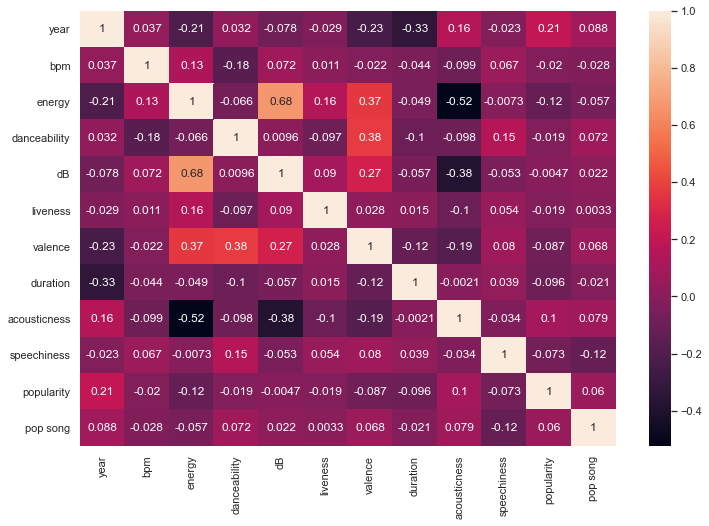

In [12]:
# Plot a heatmap with the Pearson coefficient values listed
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df3_conc.corr(), annot=True);

# Baseline Model

Now that we have an idea of what correlates best with our target variable, we can begin constructing classification models. Before creating our baseline model, let's drop the target column, along with some unnecessary features. We'll then split the data and use a StandardScaler estimator to scale our numerical data. 

In [13]:
# Drop remaining unnecessary features as well as the target variable
cols_to_drop = ['artist', 'title', 'year', 'pop song']

# Split the data into training and test sets
y = df3_conc['pop song']
df3_conc = df3_conc.drop(cols_to_drop, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df3_conc, y, test_size=.25, random_state=17)

In [14]:
# Use the StandardScaler function to scale the data
cols = X_train.columns

scaler = MinMaxScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_processed, columns = cols)
X_test = pd.DataFrame(X_test_processed, columns = cols)

X_train_processed.shape

(1788, 10)

In [15]:
# Create a baseline model - a Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

# Predict estimates for both training & test sets
y_train_hat = tree_clf.predict(X_train)
y_test_hat = tree_clf.predict(X_test)

# Print the accuracy and precision scores for both sets of data
print("Training Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_train, y_train_hat) * 100))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_test_hat) * 100))
print('')
print("Training Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_train, y_train_hat) * 100))
print("Testing Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_test, y_test_hat) * 100))

Training Accuracy for Decision Tree Classifier: 62.42%
Testing Accuracy for Decision Tree Classifier: 54.77%

Training Precision for Decision Tree Classifier: 56.44%
Testing Precision for Decision Tree Classifier: 47.44%


In [16]:
# Print the classification report
print(f'Decision Tree: \n {classification_report(y_test, y_test_hat)}')

Decision Tree: 
               precision    recall  f1-score   support

         0.0       0.69      0.41      0.51       347
         1.0       0.47      0.74      0.58       250

    accuracy                           0.55       597
   macro avg       0.58      0.57      0.55       597
weighted avg       0.60      0.55      0.54       597



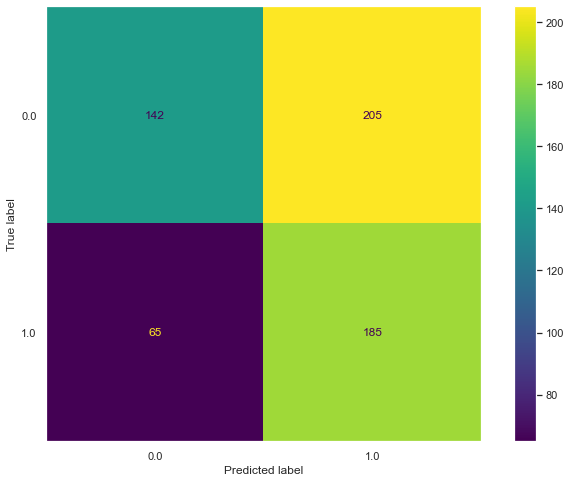

In [17]:
# Plot the confusion matrix 
#plot_confusion_matrix(tree_clf, X_test, y_test)
cm = confusion_matrix(y_test, y_test_hat, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)
plt.show();

In [18]:
# Compute the ROC AUC score
roc_auc_score(y_test, y_test_hat)

0.5746109510086455

In [19]:
# Generate a sorted dictionary listing the feature importances
feature_rankings = {}
for fi, feature in sorted(zip(tree_clf.feature_importances_, X_train.columns), reverse=True):
    feature_rankings[feature] = fi
print(feature_rankings)

{'duration': 0.1903684927301786, 'speechiness': 0.17379994616509156, 'acousticness': 0.1501861348237919, 'danceability': 0.14340348615009707, 'bpm': 0.10266980347926628, 'popularity': 0.07685064346036895, 'dB': 0.07232020540032155, 'liveness': 0.046266793570542156, 'energy': 0.04413449422034179, 'valence': 0.0}


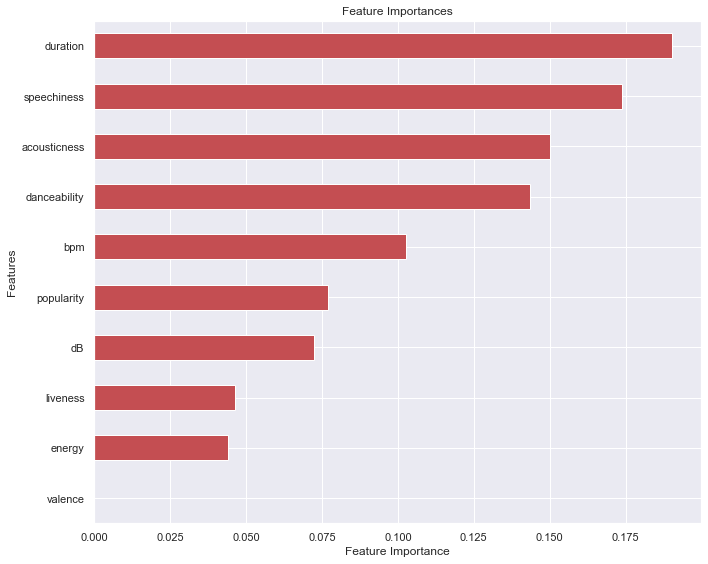

In [20]:
# Visualize the feature importances
importances = tree_clf.feature_importances_
important_features = pd.Series(importances, index=X_train.columns)


fig, ax = plt.subplots(figsize=(10, 8))
important_features.nsmallest(10).plot(kind='barh', color='r')
ax.set_title("Feature Importances")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
fig.tight_layout()

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

plot_feature_importances(tree_clf)

In [21]:
dt_param_grid = {'criterion': ['gini', 'entropy'], 
                'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_split': [2, 5, 10, 15, 20, 25], 
                'min_samples_leaf': [2, 5, 10, 15, 20, 25]}

In [22]:
dt_clf = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10, 15, 20, 25]},
             return_train_score=True)

In [23]:
# Print the "optimal" hyperparameter combination
print(f'Best Parameter Combination Found During Grid Search: \n {dt_grid_search.best_params_}')

Best Parameter Combination Found During Grid Search: 
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 2}


In [24]:
# Calculate the mean train score
print(np.mean(dt_grid_search.cv_results_['mean_train_score']))

0.667272519448096


In [25]:
# Calculate the testing score
dt_grid_search.score(X_test, y_test)

0.559463986599665

In [26]:
# Instantiate & fit the Decision Tree model with the "optimal" hyperparameters
optimal_dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=25, min_samples_split=2)
optimal_dt.fit(X_train, y_train)

# Predict estimates
y_train_hat = optimal_dt.predict(X_train)
y_test_hat = optimal_dt.predict(X_test)

# Print accuracy and precision scores
print("Training Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_train, y_train_hat) * 100))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_test_hat) * 100))
print('')
print("Training Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_train, y_train_hat) * 100))
print("Testing Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_test, y_test_hat) * 100))

Training Accuracy for Decision Tree Classifier: 68.12%
Testing Accuracy for Decision Tree Classifier: 55.95%

Training Precision for Decision Tree Classifier: 63.96%
Testing Precision for Decision Tree Classifier: 48.04%


# Further Modeling 

Now we've established our baseline model with the best possible combination of parameters. However, this is just the standard for comparison - and to be frank, improvement. We'll construct another model using ensemble methods - specifically, the Random Forests method. First we'll create a Random Forests model with a few hyperparameters before potentially tuning for an "optimal" look.

In [27]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.7153243847874721
0.5996649916247906


In [28]:
y_train_hat = forest.predict(X_train)
y_test_hat = forest.predict(X_test)

# Print accuracy and precision scores
print("Training Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_train, y_train_hat) * 100))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_test_hat) * 100))
print('')
print("Training Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_train, y_train_hat) * 100))
print("Testing Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_test, y_test_hat) * 100))

Training Accuracy for Decision Tree Classifier: 71.53%
Testing Accuracy for Decision Tree Classifier: 59.97%

Training Precision for Decision Tree Classifier: 72.14%
Testing Precision for Decision Tree Classifier: 52.4%


In [29]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train,
                                          y_train, cv=5))
print(mean_rf_cv_score)

0.6263978216985118


In [37]:
rf_param_grid = {'n_estimators': [30, 50, 100, 125],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 4, 6, 8, 10],
                'min_samples_split': [5, 10, 15], 
                'min_samples_leaf': [5, 10, 15]}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)

In [38]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 6, 8, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [30, 50, 100, 125]})

In [39]:
print(f'Testing Accuracy: {rf_grid_search.best_score_: .2%}')
print('')
print(f'Optimal Parameters: {rf_grid_search.best_params_}')

Testing Accuracy:  63.42%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 100}


In [40]:
forest_2 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=15, min_samples_split=10)
forest_2.fit(X_train, y_train)
print(forest_2.score(X_train, y_train))
print(forest_2.score(X_test, y_test))

0.7460850111856824
0.6130653266331658


In [41]:
y_train_hat = forest_2.predict(X_train)
y_test_hat = forest_2.predict(X_test)

# Print accuracy and precision scores
print("Training Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_train, y_train_hat) * 100))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_test_hat) * 100))
print('')
print("Training Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_train, y_train_hat) * 100))
print("Testing Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_test, y_test_hat) * 100))

Training Accuracy for Decision Tree Classifier: 74.61%
Testing Accuracy for Decision Tree Classifier: 61.31%

Training Precision for Decision Tree Classifier: 75.83%
Testing Precision for Decision Tree Classifier: 53.82%


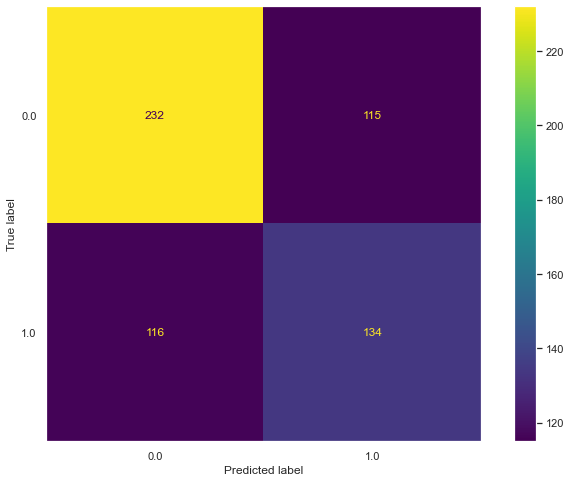

In [42]:
cm = confusion_matrix(y_test, y_test_hat, labels=forest_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=forest_2.classes_)
disp.plot()
plt.grid(False)
plt.show();

# Final Model

We'll be using Support Vector Machines (SVM)

In [60]:
svm_clf = svm.SVC()
svm_clf.fit(X_train_processed, y_train)

SVC()

In [61]:
print(svm_clf.score(X_train_processed, y_train))
print(svm_clf.score(X_test_processed, y_test))

0.6319910514541387
0.6063651591289783


In [63]:
y_train_hat = svm_clf.predict(X_train_processed)
y_test_hat = svm_clf.predict(X_test_processed)

print("Training Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_train, y_train_hat) * 100))
print("Testing Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_test, y_test_hat) * 100))

Training Precision for Decision Tree Classifier: 61.4%
Testing Precision for Decision Tree Classifier: 53.01%


-Another model (K-nearest neighbors?)
-Make a decision!!
-Looking for accuracy or precision? Aim for that! Improve precision.
-Relook at SVM
-Two more visuals!

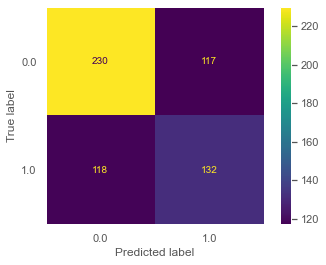

In [64]:
cm = confusion_matrix(y_test, y_test_hat, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm_clf.classes_)
disp.plot()
plt.grid(False)
plt.show();

In [69]:
gbt_clf = GradientBoostingClassifier(random_state=17)
gbt_clf.fit(X_train, y_train)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [73]:
# Print accuracy and precision scores
print("Training Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_train, gbt_clf_train_preds) * 100))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, gbt_clf_test_preds) * 100))
print('')
print("Training Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_train, gbt_clf_train_preds) * 100))
print("Testing Precision for Decision Tree Classifier: {:.4}%".format(precision_score(y_test, gbt_clf_test_preds) * 100))

Training Accuracy for Decision Tree Classifier: 75.34%
Testing Accuracy for Decision Tree Classifier: 58.12%

Training Precision for Decision Tree Classifier: 73.84%
Testing Precision for Decision Tree Classifier: 50.0%


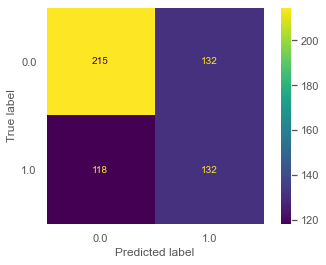

In [74]:
cm = confusion_matrix(y_test, gbt_clf_test_preds, labels=gbt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbt_clf.classes_)
disp.plot()
plt.grid(False)
plt.show();

In [76]:
print(cross_val_score(gbt_clf, df3_conc, y, cv=5).mean())

0.5463312368972746
